In [1]:
import pandas as pd
import numpy as np
from fastai.structured import *
from fastai.column_data import *
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score
from metrics import print_metrics_binary
import matplotlib.pyplot as plt
#from tqdm import TqdmSynchronisationWarning
np.set_printoptions(threshold=50, edgeitems=20)

/home/andreas/anaconda3/lib/python3.6/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 2] No such file or directory: 'uname': 'uname'
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


In [2]:
#print(torch.cuda.current_device())
#torch.cuda.set_device(1)

In [3]:
#warnings.filterwarnings("ignore", category=TqdmSynchronisationWarning)

In [4]:
train = pd.read_csv('./datasets/ihm/train_data_90.csv')
test = pd.read_csv('./datasets/ihm/test_data_90.csv')
val = pd.read_csv('./datasets/ihm/val_data_90.csv')
train_data = train.drop('Unnamed: 0', axis=1)
test_data = test.drop('Unnamed: 0', axis=1)
val_data = val.drop('Unnamed: 0', axis=1)

In [ ]:
train_data = train_data.reset_index().drop('index', axis=1)
val_data = val_data.reset_index().drop('index', axis=1)
test_data = test_data.reset_index().drop('index', axis=1)


def balance_dataset(df):
    num_died = len(train_data[train_data['Mortality'] == 1])
    num_survived = len(train_data[train_data['Mortality'] == 0])
    mortal_df = df[df['Mortality'] == 1].copy()
    counter = 0
    increased = 0
    new_data = df.copy()
    while increased < num_died*4:
        if mortal_df.iloc[counter]['Mortality'] == 1:
            new_patient = df.iloc[counter].copy()
            new_data.append(new_patient)
            increased = increased + 1
        counter = counter +1
        if counter == len(mortal_df): 
            counter = 0
        print(str(increased) +"/" + str(num_died))
    print(num_died+increased, num_survived)
    return df


train_data = balance_dataset(train_data)

1/3583
2/3583
3/3583
4/3583
5/3583
6/3583
7/3583
8/3583
9/3583
10/3583
11/3583
12/3583
13/3583
14/3583
15/3583
16/3583
17/3583
18/3583
19/3583
20/3583
21/3583
22/3583
23/3583
24/3583
25/3583
26/3583
27/3583
28/3583
29/3583
30/3583
31/3583
32/3583
33/3583
34/3583
35/3583
36/3583
37/3583
38/3583
39/3583
40/3583
41/3583
42/3583
43/3583
44/3583
45/3583
46/3583
47/3583
48/3583
49/3583
50/3583
51/3583
52/3583
53/3583
54/3583
55/3583
56/3583
57/3583
58/3583
59/3583
60/3583
61/3583
62/3583
63/3583
64/3583
65/3583
66/3583
67/3583
68/3583
69/3583
70/3583
71/3583
72/3583
73/3583
74/3583
75/3583
76/3583
77/3583
78/3583
79/3583
80/3583
81/3583
82/3583
83/3583
84/3583
85/3583
86/3583
87/3583
88/3583
89/3583
90/3583
91/3583
92/3583
93/3583
94/3583
95/3583
96/3583
97/3583
98/3583
99/3583
100/3583
101/3583
102/3583
103/3583
104/3583
105/3583
106/3583
107/3583
108/3583
109/3583
110/3583
111/3583
112/3583
113/3583
114/3583
115/3583
116/3583
117/3583
118/3583
119/3583
120/3583
121/3583
122/3583
123/3583
1

In [6]:
train_data = train_data.reset_index().drop('index', axis=1)
val_data = val_data.reset_index().drop('index', axis=1)
test_data = test_data.reset_index().drop('index', axis=1)

In [7]:
print(len(train_data[train_data['Mortality'] == 1]))
print(len(train_data[train_data['Mortality'] == 0]))

3150
19253


In [8]:
train_size = len(train_data)
train_data = train_data.append(val_data)


print(train_size)
print(len(train_data))
val_idx = list(range(train_size, len(train_data)))

22403
25591


In [9]:
cat_vars = ['Capillary refill rate', 'Glascow coma scale eye opening' ,'Glascow coma scale motor response','Glascow coma scale total', 'Glascow coma scale verbal response']

all_cat_vars = []
counter = 0
for cat in cat_vars:
    for i in range(0,90):
        all_cat_vars.append(cat+str(i))

all_cat_vars.append('Length')
for v in all_cat_vars: train_data[v] = train_data[v].astype('category').cat.as_ordered()
for v in all_cat_vars: test_data[v] = test_data[v].astype('category').cat.as_ordered()

cat_sz = [(c, len(train_data[c].cat.categories)+1) for c in all_cat_vars]

print(cat_sz)

emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]

[('Capillary refill rate0', 3), ('Capillary refill rate1', 3), ('Capillary refill rate2', 3), ('Capillary refill rate3', 3), ('Capillary refill rate4', 3), ('Capillary refill rate5', 3), ('Capillary refill rate6', 3), ('Capillary refill rate7', 3), ('Capillary refill rate8', 3), ('Capillary refill rate9', 3), ('Capillary refill rate10', 3), ('Capillary refill rate11', 3), ('Capillary refill rate12', 3), ('Capillary refill rate13', 3), ('Capillary refill rate14', 3), ('Capillary refill rate15', 3), ('Capillary refill rate16', 3), ('Capillary refill rate17', 3), ('Capillary refill rate18', 3), ('Capillary refill rate19', 3), ('Capillary refill rate20', 3), ('Capillary refill rate21', 3), ('Capillary refill rate22', 3), ('Capillary refill rate23', 3), ('Capillary refill rate24', 3), ('Capillary refill rate25', 3), ('Capillary refill rate26', 3), ('Capillary refill rate27', 3), ('Capillary refill rate28', 3), ('Capillary refill rate29', 3), ('Capillary refill rate30', 3), ('Capillary refil

In [10]:
test_data.head()

,Hours0,Capillary refill rate0,Diastolic blood pressure0,Fraction inspired oxygen0,Glascow coma scale eye opening0,Glascow coma scale motor response0,Glascow coma scale total0,Glascow coma scale verbal response0,Glucose0,Heart Rate0,...,Height89,Mean blood pressure89,Oxygen saturation89,Respiratory rate89,Systolic blood pressure89,Temperature89,Weight89,pH89,Mortality,Length
0,0.433333,0.0,49.0,0.21,Spontaneously,Obeys Commands,15.0,Oriented,128.0,81.0,...,170.0,64.333298,98.0,16.0,99.0,36.333334,81.000000,7.47,1,49
1,0.078333,0.0,38.0,0.21,Spontaneously,Obeys Commands,15.0,Oriented,128.0,65.0,...,170.0,82.000000,98.0,10.0,169.0,37.055599,64.900002,5.00,0,69
2,0.700000,0.0,43.0,0.21,Spontaneously,Obeys Commands,15.0,Oriented,128.0,70.0,...,170.0,54.666698,97.0,25.0,100.0,36.333334,81.000000,7.40,0,48
3,0.316944,0.0,64.0,0.21,Spontaneously,Obeys Commands,15.0,Oriented,128.0,67.0,...,170.0,67.000000,94.0,17.0,109.0,37.700001,90.199997,7.37,0,86
4,2.089167,0.0,35.0,0.21,To Speech,Localizes Pain,10.0,Incomprehensible sounds,128.0,96.0,...,170.0,69.000000,99.0,13.0,105.0,35.222223,83.000000,7.40,0,56


In [11]:
print(len(train_data[train_data['Mortality'] == 1]))
print(len(train_data[train_data['Mortality'] == 0]))

3583
22008


In [12]:
print(len(train_data.columns))
print(len(test_data.columns))

1622
1622


In [13]:
df, y, nas, mapper = proc_df(train_data, 'Mortality', do_scale=True)
df_test, y_test, nas_test, mapper_test = proc_df(test_data, 'Mortality', do_scale=True, mapper=mapper, na_dict=nas) 

md = ColumnarModelData.from_data_frame('./datasets/ihm/', val_idx, df, y.astype(np.float32), cat_flds=all_cat_vars, bs=32,
                                       test_df=df_test)

In [14]:
m = md.get_learner(emb_szs, len(df.columns)-len(all_cat_vars),
                   0.4, 1, [2000,1000,500], [0.5,0.4, 0.3], y_range=[0,1], crit = torch.nn.functional.binary_cross_entropy)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 56%|█████▋    | 395/701 [00:31<00:24, 12.38it/s, loss=1.48] 

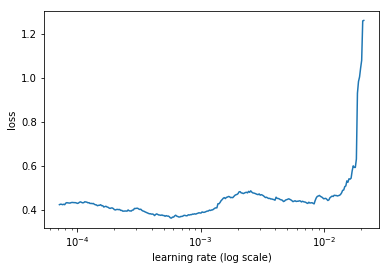

In [15]:
m.lr_find()
m.sched.plot(100)


In [16]:
lr = 0.00005


In [17]:
lrs = [lr/9, lr/6, lr/3]

In [18]:
m.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

 13%|█▎        | 94/701 [00:07<00:49, 12.25it/s, loss=0.662]

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/andreas/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/andreas/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/andreas/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss                               
    0      0.338206   0.32489   
    1      0.312522   0.313109                               
    2      0.306356   0.307808                               
    3      0.292566   0.309692                               
    4      0.286306   0.3042                                 
    5      0.258048   0.30249                                
    6      0.268903   0.302652                               



[array([0.30265])]

In [19]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2748  114]
 [ 243  131]]
accuracy = 0.8896786
precision class 0 = 0.91875625
precision class 1 = 0.5346939
recall class 0 = 0.9601677
recall calss 1 = 0.35026738
AUC of ROC = 0.6552175472819203
AUC of PRC = 0.48002698213795003
min(+P, Se) = 0.3502673796791444


In [20]:
m.fit(lrs, 1, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss                               
    0      0.272303   0.303354  



[array([0.30335])]

In [21]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2739  123]
 [ 239  135]]
accuracy = 0.8881335
precision class 0 = 0.9197448
precision class 1 = 0.5232558
recall class 0 = 0.9570231
recall calss 1 = 0.36096257
AUC of ROC = 0.6589928138207827
AUC of PRC = 0.47903749695050196
min(+P, Se) = 0.3609625668449198


HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 52%|█████▏    | 368/701 [00:28<00:25, 12.97it/s, loss=0.995]

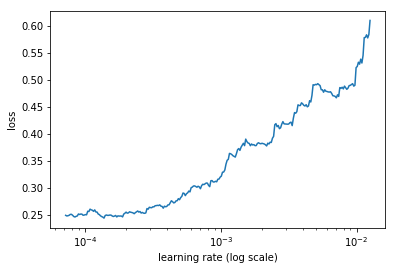

In [22]:
m.lr_find()
m.sched.plot(100)

In [23]:
m.fit(lrs, 2, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

  3%|▎         | 19/701 [00:01<00:53, 12.77it/s, loss=0.256]

Exception in thread Thread-14:
Traceback (most recent call last):
  File "/home/andreas/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/andreas/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/andreas/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss                               
    0      0.262324   0.302259  
    1      0.255054   0.301699                               
    2      0.247396   0.302341                               



[array([0.30234])]

In [24]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2744  118]
 [ 237  137]]
accuracy = 0.89029664
precision class 0 = 0.92049646
precision class 1 = 0.5372549
recall class 0 = 0.9587701
recall calss 1 = 0.36631015
AUC of ROC = 0.662540125636685
AUC of PRC = 0.4884018142598089
min(+P, Se) = 0.3663101604278075


In [25]:
m.fit(0.0001, 2, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss                               
    0      0.277581   0.312411  
    1      0.240072   0.305793                               
    2      0.279055   0.315861                               
    3      0.242465   0.306153                               



[array([0.30615])]

In [26]:
y_predicted = m.predict(is_test=True)
preds = []
for pred in y_predicted:
    if pred > 0.5: 
        preds.append(1)
    else: 
        preds.append(0)
metrics = print_metrics_binary(y_test, preds)

confusion matrix:
[[2765   97]
 [ 249  125]]
accuracy = 0.89307785
precision class 0 = 0.9173855
precision class 1 = 0.5630631
recall class 0 = 0.9661076
recall calss 1 = 0.3342246
AUC of ROC = 0.6501661079907473
AUC of PRC = 0.48711725497699465
min(+P, Se) = 0.3342245989304813
